<a href="https://colab.research.google.com/github/JPeebles-DataScientist/Project1_Core/blob/main/Project1_Core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
from sklearn import set_config
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer


set_config(display='diagram')



In [2]:
filename = '/content/sales_predictions.csv'
df = pd.read_csv(filename)
df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
#How many rows and columns?
rows = df.shape[0]
cols = df.shape[1]

print("Rows: " + str(rows))
print("Columns: " + str(cols))

Rows: 8523
Columns: 12


In [4]:
#What are the datatypes of each variable?
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [5]:
#Are there duplicates?
df.duplicated().sum()

0

In [6]:
# If so, drop any duplicates.
df.drop_duplicates(keep=False,inplace=True)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.6+ KB


In [8]:
#Identify missing values.  Used https://towardsdatascience.com/how-to-check-for-missing-values-in-pandas-d2749e45a345 to identify
df.loc[:, df.isnull().any()].columns


Index(['Item_Weight', 'Outlet_Size'], dtype='object')

In [9]:
#Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent) 
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [10]:
#Rename LF/low fat columns to Low Fat and reg to Regular
df['Item_Fat_Content'].replace({'LF':'Low Fat', 'low fat':'Low Fat','reg':'Regular'},inplace=True)
df['Item_Fat_Content'].value_counts()


Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [11]:
#Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent) 
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [12]:
# Ordinal Encoding 'Outlet Location Type'
replacement_dictionary = {'Tier 3':3, 'Tier 2':2, 'Tier 1':1}
df['Outlet_Location_Type'].replace(replacement_dictionary, inplace=True)
df['Outlet_Location_Type']

0       1
1       3
2       1
3       3
4       3
       ..
8518    3
8519    2
8520    2
8521    3
8522    1
Name: Outlet_Location_Type, Length: 8523, dtype: int64

In [13]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [14]:
#Identify missing values.  Used https://towardsdatascience.com/how-to-check-for-missing-values-in-pandas-d2749e45a345 to identify
df.loc[:, df.isnull().any()].columns

Index(['Item_Weight', 'Outlet_Size'], dtype='object')

In [15]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,3,Supermarket Type1,994.7052


In [16]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2.112871,2181.288914
std,4.643456,0.051598,62.275067,8.371760,0.812757,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,1.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,1.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,2.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,3.000000,13086.964800


In [17]:
#Format for Test Train Split

X = df.drop(columns = ['Item_Outlet_Sales','Item_Identifier'])
y = df['Item_Outlet_Sales']
# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [18]:
# Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')



In [19]:
# create one-hot encode the categorical columns (zipcode) and scale the numeric columns
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
scaler = StandardScaler()


# Use 2 tuples, one for numeric and one for categorical
ohe_processor = make_pipeline(freq_imputer, ohe)
num_processor = make_pipeline(mean_imputer, scaler)



In [20]:
ohe_tuple = (ohe_processor, cat_selector)
scaler_tuple = (num_processor, num_selector)


# Combine the pipelines in a ColumnTransformer with the appropriate column selectors
transformer = make_column_transformer(scaler_tuple, ohe_tuple, remainder='passthrough')



In [21]:
# instantiate a baseline model using the 'mean' strategy
dummy = DummyRegressor(strategy='mean')
# put your ColumnTransformer and the baseline model into a pipeline
base_pipe = make_pipeline(transformer, dummy)

# fit your pipe onto the training data
base_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3b3c9cccd0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3b3c9cc450>)])),
                ('dummyregressor', DummyRegressor())])

In [22]:
# define a function that takes true and predicted values as arguments

def eval_model(true, pred):
  mae = mean_absolute_error(true, pred)
  mse = mean_squared_error(true, pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(true, pred)

  print(f'MAE: {mae:,.2f} \n MSE: {mse:,.2f} \n RMSE: {rmse:,.2f} \n R2: {r2:,.2f} ')


# and prints all 4 metrics

In [23]:
# find MAE, MSE, RMSE and R2 on the baseline model for both the train and test data
print('Train Evaluation')

eval_model(y_train, base_pipe.predict(X_train))

print('\n Test Evaluation')

eval_model(y_test, base_pipe.predict(X_test))

Train Evaluation
MAE: 1,360.22 
 MSE: 2,959,455.70 
 RMSE: 1,720.31 
 R2: 0.00 

 Test Evaluation
MAE: 1,326.12 
 MSE: 2,772,144.46 
 RMSE: 1,664.98 
 R2: -0.00 


In [24]:
# instantiate a linear regression model
# put your ColumnTransformer and linear regression model into a pipeline
# fit your pipe on the training data

lin_reg = make_pipeline(transformer, LinearRegression())

lin_reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3b3c9cccd0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3b3c9cc450>)])),
                ('linearregression', LinearRegression())])

In [25]:
# Numeric pipeline
num_processor = make_pipeline(mean_imputer, scaler)
num_processor

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [26]:
# Categorical pipeline
cat_processsor = make_pipeline(freq_imputer, ohe)
cat_processsor

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [27]:
from sklearn.linear_model import LinearRegression


In [28]:
# Make a linear regression instance
reg = LinearRegression()

In [29]:
linreg_pipe = make_pipeline(transformer,reg)



In [30]:
linreg_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3b3c9cccd0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3b3c9cc450>)])),
                ('linearregression', LinearRegression())])

In [31]:
#Evaluate model performance using R^2 on the training set and on the test set.  
#Is there a difference between model performance on the training data vs the test data?

train_score = linreg_pipe.score(X_train, y_train)
print(train_score)

test_score = linreg_pipe.score(X_test, y_test)
print(test_score)




0.5615550545482637
0.5671035705758181


Our model was not overfit.

In [32]:
# find MAE, MSE, RMSE, and R2 of the linear regreesion model on both train and test data

print('Train Evaluation')

eval_model(y_train, lin_reg.predict(X_train))

print('\n Test Evaluation')

eval_model(y_test, lin_reg.predict(X_test))

Train Evaluation
MAE: 847.13 
 MSE: 1,297,558.39 
 RMSE: 1,139.10 
 R2: 0.56 

 Test Evaluation
MAE: 804.12 
 MSE: 1,194,351.42 
 RMSE: 1,092.86 
 R2: 0.57 


In [33]:
bias_tree = DecisionTreeRegressor(max_depth = 5)

bias_tree_pipe = make_pipeline(transformer, bias_tree)

bias_tree_pipe.fit(X_train, y_train)

print('Training Scores for High Bias Decision Tree')
eval_model(y_train, bias_tree_pipe.predict(X_train))
print('\n')

print ('Testing Scores for High Bias Decision Tree')
eval_model(y_test, bias_tree_pipe.predict(X_test))

Training Scores for High Bias Decision Tree
MAE: 762.61 
 MSE: 1,172,122.77 
 RMSE: 1,082.65 
 R2: 0.60 


Testing Scores for High Bias Decision Tree
MAE: 738.32 
 MSE: 1,118,185.97 
 RMSE: 1,057.44 
 R2: 0.59 


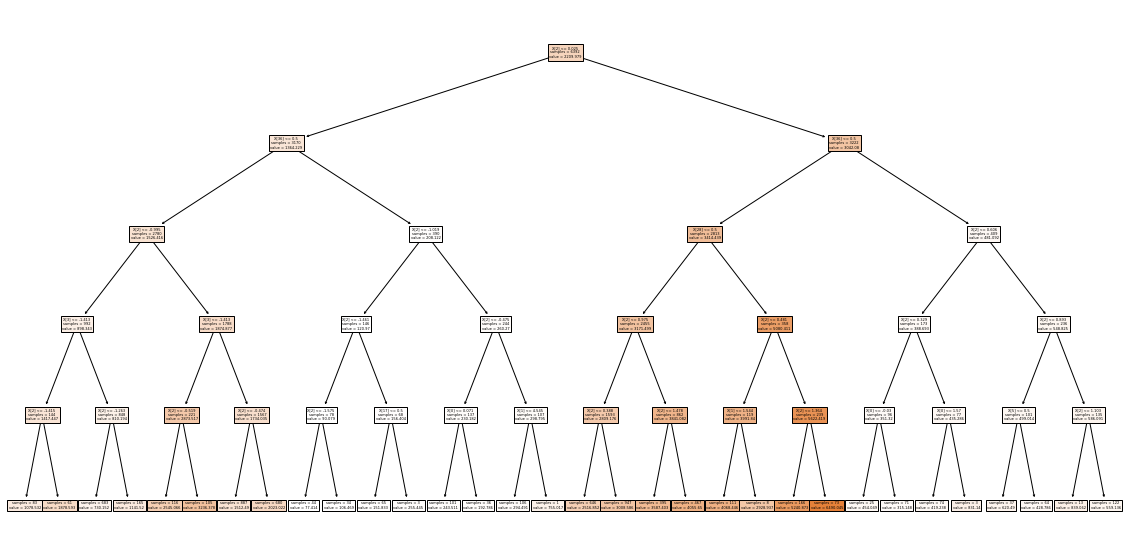

In [34]:
fig, ax = plt.subplots(figsize=(20,10))
plot_tree(bias_tree, filled=True, impurity=False);

In [35]:
var_tree = DecisionTreeRegressor(max_depth=40)

var_tree_pipe = make_pipeline(transformer, var_tree)

var_tree_pipe.fit(X_train, y_train)

print('Training Scores for High Variance Decision Tree')
eval_model(y_train, var_tree_pipe.predict(X_train))

print('\n')

print('Testing Scores for High Variance Decision Tree')
eval_model(y_test, var_tree_pipe.predict(X_test))

Training Scores for High Variance Decision Tree
MAE: 0.00 
 MSE: 0.00 
 RMSE: 0.00 
 R2: 1.00 


Testing Scores for High Variance Decision Tree
MAE: 1,050.36 
 MSE: 2,255,940.56 
 RMSE: 1,501.98 
 R2: 0.18 


In [36]:
var_tree.get_depth()

40

In [37]:
# create a range of max_depth values
depths = range(1, var_tree.get_depth())

#create a dataframe to store train and test scores.
scores = pd.DataFrame(columns=['Train', 'Test'], index=depths)

#loop over the values in depths 
for n in depths:
  #fit a new model with max depth
  tree = DecisionTreeRegressor(max_depth=n)

  #put model in a pipeline
  tree_pipe = make_pipeline(transformer, tree)

  #fit the model
  tree_pipe.fit(X_train, y_train)

  #create prediction arrays
  train_pred = tree_pipe.predict(X_train)
  test_pred = tree_pipe.predict(X_test)

  #evaluate the model using R2 score
  train_r2score = r2_score(y_train, train_pred)
  test_r2score = r2_score(y_test, test_pred)

  #store the scores in a dataframe
  scores.loc[n, 'Train'] = train_r2score
  scores.loc[n, 'Test'] = test_r2score

In [38]:
scores

,Train,Test
1,0.237797,0.229683
2,0.431641,0.433778
3,0.524218,0.524222
4,0.582625,0.584005
5,0.60394,0.59471
6,0.615161,0.582274
7,0.626843,0.576424
8,0.643832,0.560135
9,0.665649,0.538379
10,0.685258,0.531281


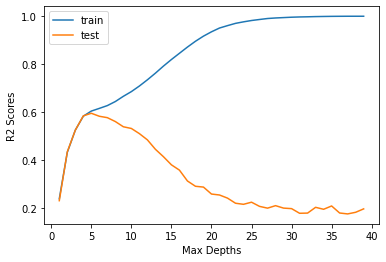

In [39]:
#plot the scores to visually determine the best max_depth
plt.plot(depths, scores['Train'], label = 'train')
plt.plot(depths, scores['Test'], label = 'test')
plt.ylabel('R2 Scores')
plt.xlabel('Max Depths')
plt.legend()
plt.show()

In [40]:
#sort the dataframe by test scores and save the index (k) of the best score
best_depth = scores.sort_values(by='Test', ascending=False).index[0]
best_depth

5

In [41]:
best_tree = DecisionTreeRegressor(max_depth=5)

best_tree_pipe = make_pipeline(transformer, best_tree)

best_tree_pipe.fit(X_train, y_train)

print('Training Scores for High Variance Decision Tree')
eval_model(y_train, best_tree_pipe.predict(X_train))

print('\n')

print('Testing Scores for High Variance Decision Tree')
eval_model(y_test, best_tree_pipe.predict(X_test))

Training Scores for High Variance Decision Tree
MAE: 762.61 
 MSE: 1,172,122.77 
 RMSE: 1,082.65 
 R2: 0.60 


Testing Scores for High Variance Decision Tree
MAE: 738.32 
 MSE: 1,118,185.97 
 RMSE: 1,057.44 
 R2: 0.59 


In [42]:
#create a range of max_depth values
depths = range(1, 20, 2)

#create a dataframe to store train and test scores.
scores = pd.DataFrame(columns=['Train', 'Test'], index=depths)

#loop over the values in depths
for n in depths:
  #Trying depth. Printing depth = n
  #fit a new model with max_depth=n
  tree = RandomForestRegressor(max_depth=n, random_state=42)

  #put the model into a pipeline
  tree_pipe = make_pipeline(transformer, tree)
  
  #fit the model
  tree_pipe.fit(X_train, y_train)
  
  #create prediction arrays
  train_pred = tree_pipe.predict(X_train)
  test_pred = tree_pipe.predict(X_test)
  
  #evaluate the model using R2 Score
  train_r2score = r2_score(y_train, train_pred)
  test_r2score = r2_score(y_test, test_pred)
  
  #store the scores in the scores dataframe
  scores.loc[n, 'Train'] = train_r2score
  scores.loc[n, 'Test'] = test_r2score

In [43]:
scores

,Train,Test
1,0.253582,0.243857
3,0.544065,0.545216
5,0.610534,0.602621
7,0.643144,0.598488
9,0.693239,0.594043
11,0.752125,0.585713
13,0.809491,0.579304
15,0.856278,0.571639
17,0.890614,0.565639
19,0.912253,0.562914


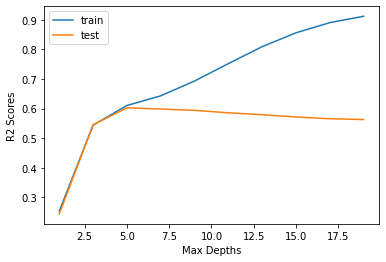

In [44]:
#plot the scores to visually determine the best max_depth
plt.plot(depths, scores['Train'], label = 'train')
plt.plot(depths, scores['Test'], label = 'test')
plt.ylabel('R2 Scores')
plt.xlabel('Max Depths')
plt.legend()
plt.show()

In [45]:
#sort the dataframe by test scores and save the index max_depth of the best score
best_depth = scores.sort_values(by='Test', ascending=False).index[0]
best_depth

5

In [46]:
#create and fit a final model using the best value for max_depth
best_tree = RandomForestRegressor(max_depth = best_depth, random_state=42)
best_tree_pipe = make_pipeline(transformer, best_tree)
best_tree_pipe.fit(X_train, y_train)

#evaluate the final model
print('Training Scores for Random Forest')
eval_model(y_train, best_tree_pipe.predict(X_train))

print('\n')

print('Testing Scores for Random Forest')
eval_model(y_test, best_tree_pipe.predict(X_test))

Training Scores for Random Forest
MAE: 755.38 
 MSE: 1,152,606.62 
 RMSE: 1,073.60 
 R2: 0.61 


Testing Scores for Random Forest
MAE: 728.35 
 MSE: 1,096,358.83 
 RMSE: 1,047.07 
 R2: 0.60 


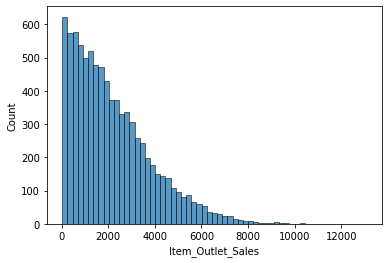

In [47]:
#Histogram to view the distributions of various features in your dataset.

sns.histplot(data = df
            ,x = 'Item_Outlet_Sales'
            )

The data is skewed to the left indicating there are more sales at the lower end of the range.

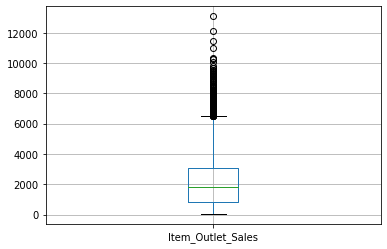

In [48]:
#Boxplot to view statistical summaries of various features in your dataset.

df.boxplot(column=[ 'Item_Outlet_Sales'])  


We might want to investigate as to why there are so many outliers in Outlet Sales. Is it based on seasonality? Was there a sale?

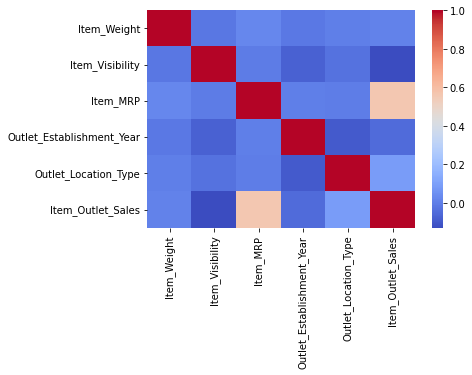

In [49]:
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm')


outlet sales  and the MRP has a positive correlation though it is not strong. I anticipated that sales would be tied more to MRP than indicated by the data.

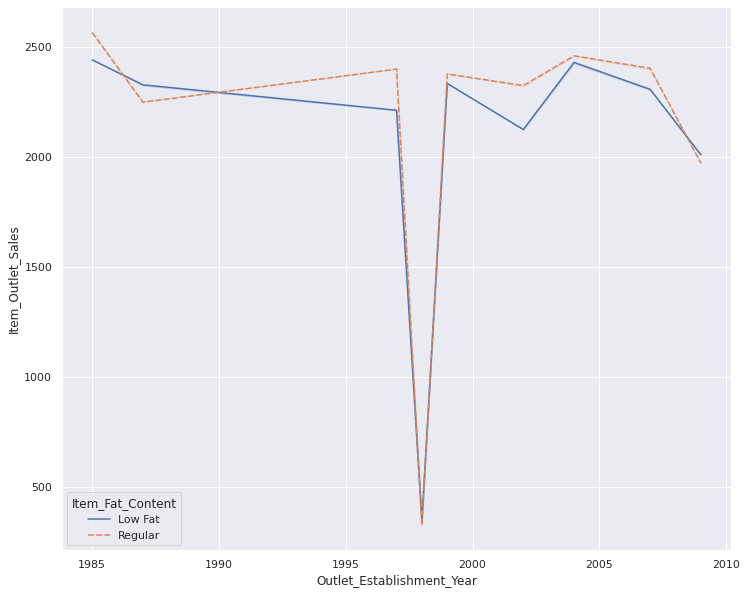

In [50]:
sns.set(rc={'figure.figsize':(12,10)})
ax = sns.lineplot(x = 'Outlet_Establishment_Year', y = 'Item_Outlet_Sales', data = df, hue = 'Item_Fat_Content', style = 'Item_Fat_Content', ci = False)

In 1998 there was a dip in sales considerably. We might want to research what happened that year to start the downward trend.

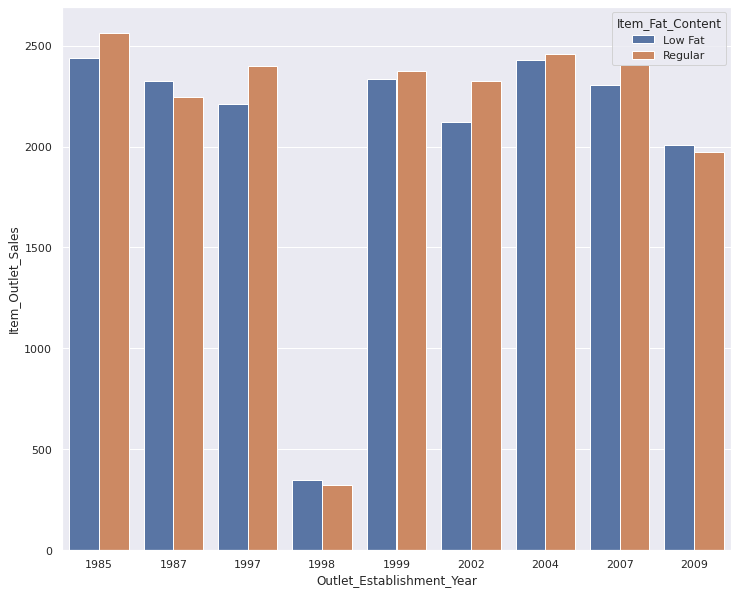

In [51]:
ax = sns.barplot(x = 'Outlet_Establishment_Year', y = 'Item_Outlet_Sales', data = df, ci = None, hue = 'Item_Fat_Content')
                 #hue = 'Item_Fat_Content', style = 'Item_Fat_Content')

In [60]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,3,Supermarket Type1,994.7052


In [61]:
#Count cereals from each manufacturer
item_counts = df['Item_Type'].value_counts().sort_values()
item_counts

Seafood                    64
Breakfast                 110
Starchy Foods             148
Others                    169
Hard Drinks               214
Breads                    251
Meat                      425
Soft Drinks               445
Health and Hygiene        520
Baking Goods              648
Canned                    649
Dairy                     682
Frozen Foods              856
Household                 910
Snack Foods              1200
Fruits and Vegetables    1232
Name: Item_Type, dtype: int64

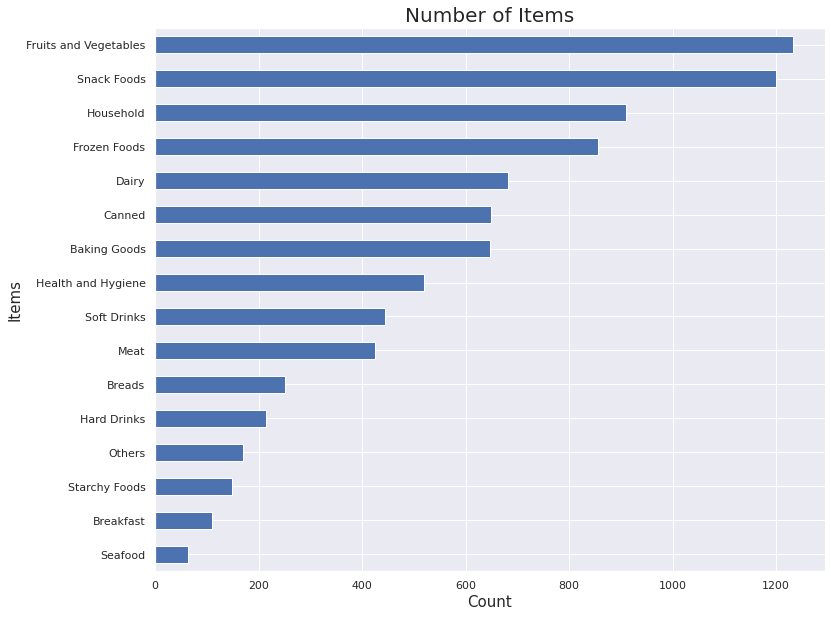

Seafood                    64
Breakfast                 110
Starchy Foods             148
Others                    169
Hard Drinks               214
Breads                    251
Meat                      425
Soft Drinks               445
Health and Hygiene        520
Baking Goods              648
Canned                    649
Dairy                     682
Frozen Foods              856
Household                 910
Snack Foods              1200
Fruits and Vegetables    1232
Name: Item_Type, dtype: int64

In [62]:
#Plot the counts of each cereal brand

item_counts.plot(kind = 'barh')
plt.title('Number of Items', fontsize = 20)
plt.ylabel('Items', fontsize = 15)
plt.xlabel('Count', fontsize = 15)

#Show your figure
plt.show()

#Display the count chart below the plot
item_counts

#Inverse the chart
# .sort_values()

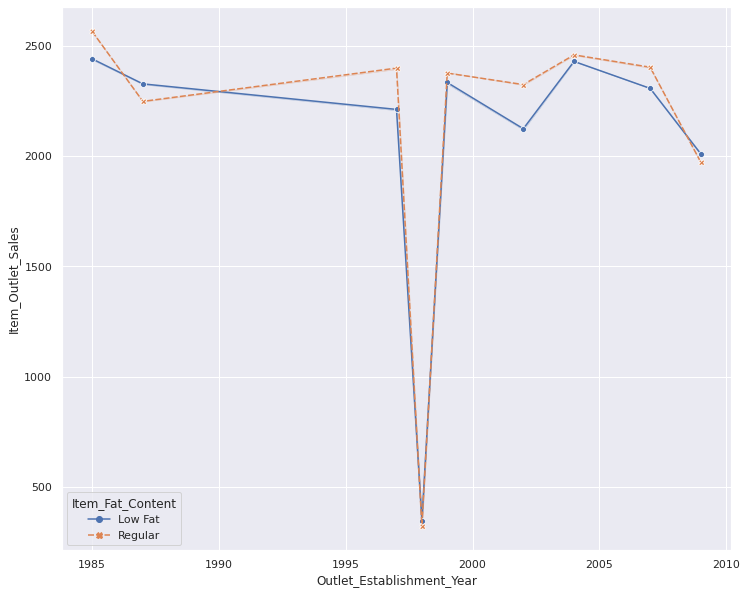

In [59]:
ax =sns.lineplot (x = 'Outlet_Establishment_Year', y = 'Item_Outlet_Sales', data = df, hue = 'Item_Fat_Content', style = 'Item_Fat_Content', ci = False, markers = True)
                 #hue = 'Item_Fat_Content', style = 'Item_Fat_Content')

Sales amongst the items seemed to be evenly distributed minus 1998.  Reg does better than the other categories.